In [1]:
import pandas as pd

In [2]:
Point2_data_Canada_No_NaN=pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_Canada_No_NaN.csv')

In [3]:
Point2_data = Point2_data_Canada_No_NaN

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
Point2_data

,Beds,Bath,Sqft,Price,Address,Province,Region,Latitude,Longitude,Location
0,3.0,1.0,1630.0,225000.0,1368 forties rd.,NS,Atlantic region,44.734216,-64.539807,"1368, Forties Road, Forties, Chester District ..."
1,2.0,1.0,944.0,174500.0,111 lakeshore dr.,NS,Atlantic region,44.701910,-63.728475,"111, Lakeshore Drive, Kingswood, Hammonds Plai..."
2,4.0,2.0,4000.0,599000.0,1734 hwy 1,NS,Atlantic region,43.926649,-66.108209,"1734, Highway 1, Wellington, Yarmouth Municipa..."
3,5.0,2.0,2721.0,690000.0,2591 clarence road,NS,Atlantic region,44.904340,-65.218431,"2591, Clarence Road, Central Clarence, Municip..."
4,15.0,6.0,6630.0,495000.0,4616 highway 1 weymouth,NS,Atlantic region,44.411117,-65.995788,"4616, Highway 1, Weymouth, Digby Municipal Dis..."
...,...,...,...,...,...,...,...,...,...,...
27693,5.0,3.0,3700.0,11000000.0,4664 192 street,BC,West Coast,49.087170,-122.690572,"4664, 192 Street, Cloverdale, Surrey, Metro Va..."
27694,4.0,3.0,3335.0,5550000.0,595 w 28th avenue,BC,West Coast,49.246290,-123.126270,"West 28th Avenue, South Cambie, Vancouver, Dis..."
27695,4.0,3.0,2511.0,3024120.0,540 poirier street,BC,West Coast,49.254926,-122.846463,"Poirier Street, Austin Heights, Coquitlam, Met..."
27696,4.0,4.0,4753.0,5180000.0,20395 74b avenue,BC,West Coast,49.138314,-122.649719,"74B Avenue, Langley Township, Township of Lang..."


## K-Means clustering

In [28]:
cluster_Point2_data=Point2_data.drop(['Address','Location','Region','Province'],axis=1)

In [29]:
cluster_Point2_data.head()

,Beds,Bath,Sqft,Price,Latitude,Longitude,Clus_Db
0,3.0,1.0,1630.0,225000.0,44.734216,-64.539807,0
1,2.0,1.0,944.0,174500.0,44.701910,-63.728475,0
2,4.0,2.0,4000.0,599000.0,43.926649,-66.108209,0
3,5.0,2.0,2721.0,690000.0,44.904340,-65.218431,0
4,15.0,6.0,6630.0,495000.0,44.411117,-65.995788,0


In [8]:
cluster_Point2_data.corr()

,Beds,Bath,Sqft,Price,Latitude,Longitude
Beds,1.000000,0.655454,0.048915,0.318383,0.071468,-0.215541
Bath,0.655454,1.000000,0.072074,0.500300,0.073612,-0.265371
Sqft,0.048915,0.072074,1.000000,0.036303,0.100281,-0.077075
Price,0.318383,0.500300,0.036303,1.000000,-0.082164,-0.263167
Latitude,0.071468,0.073612,0.100281,-0.082164,1.000000,-0.662747
Longitude,-0.215541,-0.265371,-0.077075,-0.263167,-0.662747,1.000000


### Now I need to standardlize the data.

In [30]:
from sklearn.preprocessing import StandardScaler
X = cluster_Point2_data.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.58646073, -1.20270789, -0.13165507, ..., -1.67341306,
         1.5844381 , -0.04180084],
       [-1.32187314, -1.20270789, -0.1321317 , ..., -1.68395641,
         1.6191385 , -0.04180084],
       [ 0.14895168, -0.50293679, -0.13000843, ..., -1.93696886,
         1.51735802, -0.04180084],
       ...,
       [ 0.14895168,  0.19683431, -0.13104297, ..., -0.19804359,
        -0.90931941, -0.04180084],
       [ 0.14895168,  0.8966054 , -0.12948525, ..., -0.2361009 ,
        -0.90090472, -0.04180084],
       [ 0.88436409,  3.69568979, -0.12806163, ..., -0.16621847,
        -0.92269451, -0.04180084]])

### Modeling

In [31]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 3 3 3]


In [32]:
cluster_Point2_data["Clus_km"] = labels
cluster_Point2_data.head()

,Beds,Bath,Sqft,Price,Latitude,Longitude,Clus_Db,Clus_km
0,3.0,1.0,1630.0,225000.0,44.734216,-64.539807,0,0
1,2.0,1.0,944.0,174500.0,44.701910,-63.728475,0,0
2,4.0,2.0,4000.0,599000.0,43.926649,-66.108209,0,0
3,5.0,2.0,2721.0,690000.0,44.904340,-65.218431,0,0
4,15.0,6.0,6630.0,495000.0,44.411117,-65.995788,0,0


In [33]:
cluster_Point2_data.groupby('Clus_km').mean()

,Beds,Bath,Sqft,Price,Latitude,Longitude,Clus_Db
Clus_km,,,,,,,
0,3.633525,2.479874,1.614267e+05,5.485152e+05,49.959948,-99.381213,0.000000
1,5.463636,6.263636,6.730545e+03,1.242460e+07,49.209457,-121.531042,0.881818
2,4.968750,4.218750,3.712335e+07,3.119071e+06,49.142969,-122.511052,-0.031250
3,5.010084,4.405042,5.174024e+04,3.235846e+06,49.110037,-118.018084,0.000000


<ipython-input-34-3b38e41990e5>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


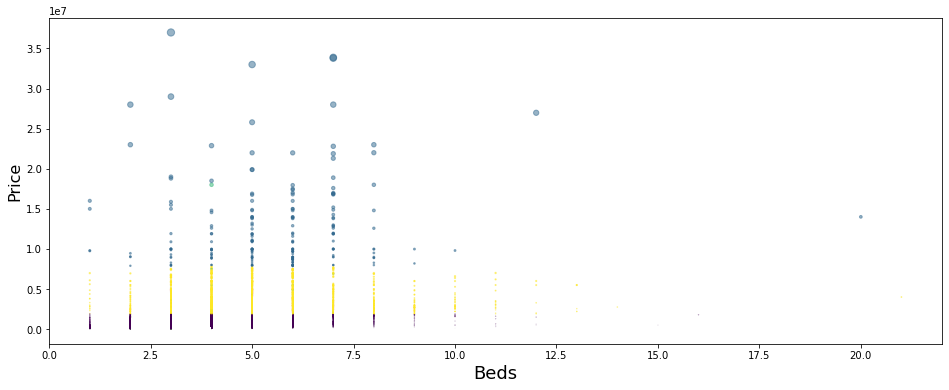

In [34]:
from matplotlib.pyplot import figure
plt.figure(figsize=(16, 6))
area = np.pi * ( X[:, 3]/9000000)**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Beds', fontsize=18)
plt.ylabel('Price', fontsize=16)
plt.show()

<ipython-input-35-1e2db7c8ce43>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


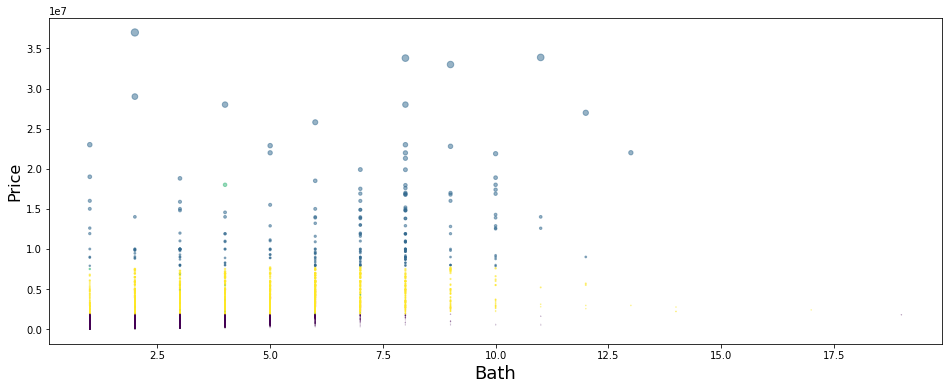

In [35]:
from matplotlib.pyplot import figure
plt.figure(figsize=(16, 6))
area = np.pi * ( X[:, 3]/9000000)**2  
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Bath', fontsize=18)
plt.ylabel('Price', fontsize=16)
plt.show()

<ipython-input-36-3124e5a17cee>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 0], X[:, 3], X[:, 2], c= labels.astype(np.float))


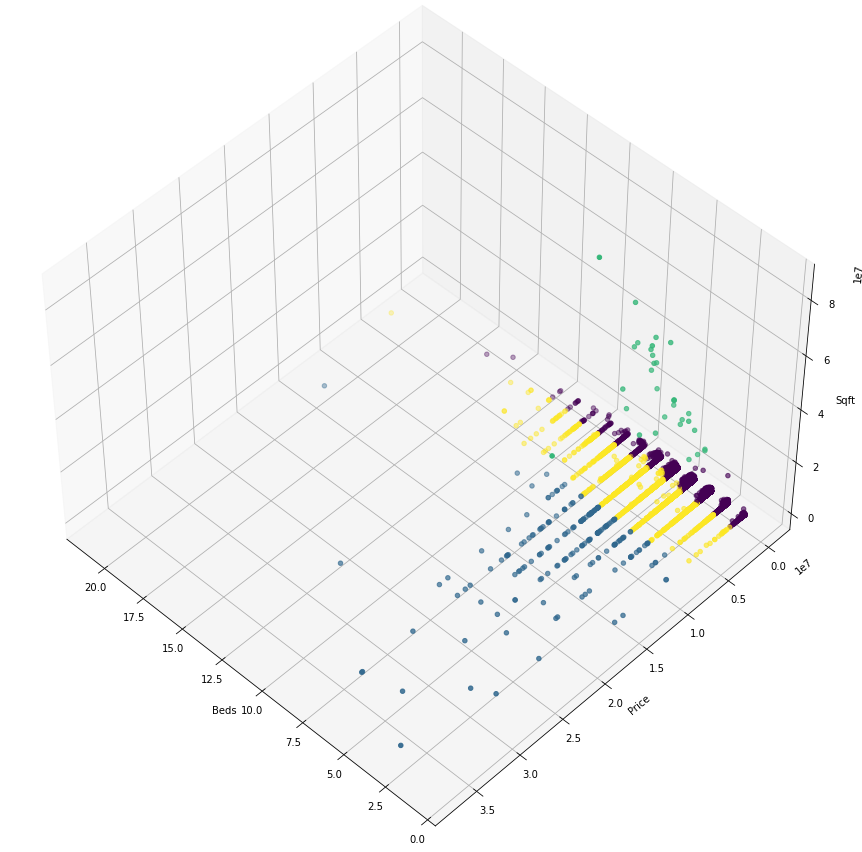

In [36]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(12,12))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Beds')
ax.set_ylabel('Price')
ax.set_zlabel('Sqft')

ax.scatter(X[:, 0], X[:, 3], X[:, 2], c= labels.astype(np.float))

## DBSCN clustering

In [6]:
Point2_data.head()

,Beds,Bath,Sqft,Price,Address,Province,Region,Latitude,Longitude,Location
0,3.0,1.0,1630.0,225000.0,1368 forties rd.,NS,Atlantic region,44.734216,-64.539807,"1368, Forties Road, Forties, Chester District ..."
1,2.0,1.0,944.0,174500.0,111 lakeshore dr.,NS,Atlantic region,44.701910,-63.728475,"111, Lakeshore Drive, Kingswood, Hammonds Plai..."
2,4.0,2.0,4000.0,599000.0,1734 hwy 1,NS,Atlantic region,43.926649,-66.108209,"1734, Highway 1, Wellington, Yarmouth Municipa..."
3,5.0,2.0,2721.0,690000.0,2591 clarence road,NS,Atlantic region,44.904340,-65.218431,"2591, Clarence Road, Central Clarence, Municip..."
4,15.0,6.0,6630.0,495000.0,4616 highway 1 weymouth,NS,Atlantic region,44.411117,-65.995788,"4616, Highway 1, Weymouth, Digby Municipal Dis..."


In [23]:
pdf = Point2_data

In [24]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Latitude','Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Price",'Latitude','Longitude',"Clus_Db"]].head(5)

,Price,Latitude,Longitude,Clus_Db
0,225000.0,44.734216,-64.539807,0
1,174500.0,44.701910,-63.728475,0
2,599000.0,43.926649,-66.108209,0
3,690000.0,44.904340,-65.218431,0
4,495000.0,44.411117,-65.995788,0


In [64]:
set(labels)

{-1, 0, 1, 2}

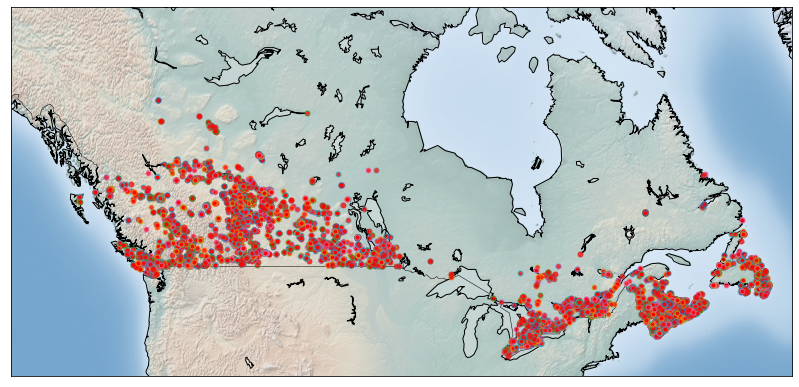

In [65]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Longitude'] > llon) & (pdf['Longitude'] < ulon) & (pdf['Latitude'] > llat) &(pdf['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Longitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()




<ipython-input-22-0e13ef4a48c0>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
<ipython-input-22-0e13ef4a48c0>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

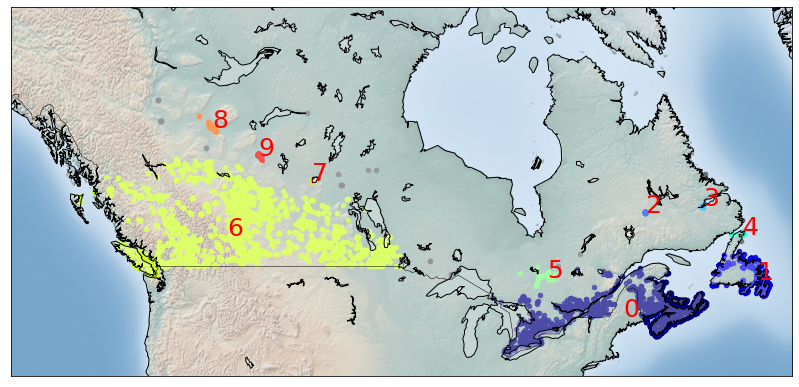

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)

In [67]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Price']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Price",'Latitude','Longitude',"Clus_Db"]].head(5)

,Price,Latitude,Longitude,Clus_Db
0,225000.0,44.734216,-64.539807,0
1,174500.0,44.701910,-63.728475,0
2,599000.0,43.926649,-66.108209,0
3,690000.0,44.904340,-65.218431,0
4,495000.0,44.411117,-65.995788,0


In [68]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [59]:
cluster_Point2_data=Point2_data.drop(['Address','Location','Region','Province'],axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler
X = cluster_Point2_data.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-5.86460731e-01, -1.20270789e+00, -1.31655074e-01, ...,
        -1.67341306e+00,  1.58443810e+00, -2.40838090e-03],
       [-1.32187314e+00, -1.20270789e+00, -1.32131699e-01, ...,
        -1.68395641e+00,  1.61913850e+00, -2.40838090e-03],
       [ 1.48951680e-01, -5.02936791e-01, -1.30008426e-01, ...,
        -1.93696886e+00,  1.51735802e+00, -2.40838090e-03],
       ...,
       [ 1.48951680e-01,  1.96834306e-01, -1.31042966e-01, ...,
        -1.98043588e-01, -9.09319411e-01, -2.40838090e-03],
       [ 1.48951680e-01,  8.96605404e-01, -1.29485251e-01, ...,
        -2.36100901e-01, -9.00904718e-01, -2.40838090e-03],
       [ 8.84364091e-01,  3.69568979e+00, -1.28061630e-01, ...,
        -1.66218472e-01, -9.22694510e-01, -2.40838090e-03]])

No handles with labels found to put in legend.
<ipython-input-72-08c4f6cd3a8f>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 0], X[:, 3], X[:, 2], c= labels.astype(np.float))


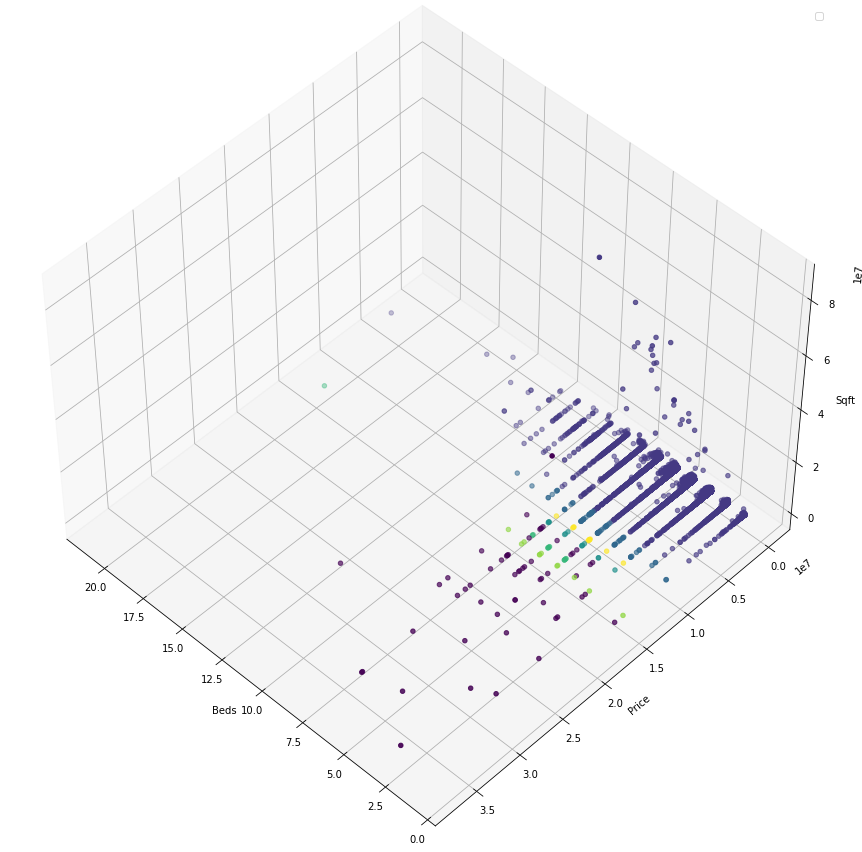

In [72]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(12,12))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Beds')
ax.set_ylabel('Price')
ax.set_zlabel('Sqft')
ax.legend()

ax.scatter(X[:, 0], X[:, 3], X[:, 2], c= labels.astype(np.float))

<ipython-input-69-0e13ef4a48c0>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
<ipython-input-69-0e13ef4a48c0>:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

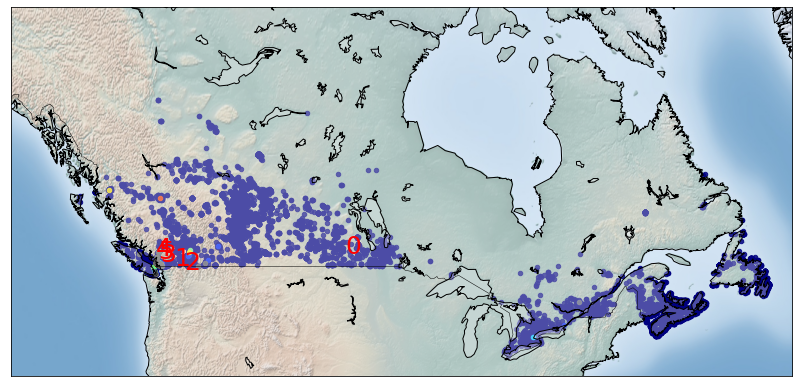

In [69]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)

In [71]:
pdf.groupby('Clus_Db').mean()

,Beds,Bath,Sqft,Price,Latitude,Longitude,xm,ym
Clus_Db,,,,,,,,
-1,5.589286,7.160714,989235.232143,1.931718e+07,49.202483,-122.077113,1.992933e+06,1.442133e+06
0,3.786005,2.694402,190382.055180,8.504577e+05,49.866300,-101.448236,4.286759e+06,1.572219e+06
1,5.250000,5.654762,5719.833333,9.406789e+06,49.098708,-121.150860,2.095928e+06,1.425412e+06
2,5.500000,6.214286,6968.214286,1.185157e+07,48.762132,-120.062266,2.216974e+06,1.370599e+06
3,7.090909,6.909091,8226.545455,1.391127e+07,49.400669,-122.830945,1.909111e+06,1.475774e+06
4,5.272727,6.090909,8121.090909,1.492253e+07,49.806498,-123.255010,1.861957e+06,1.549530e+06
5,5.166667,6.166667,5298.750000,1.095530e+07,49.618472,-123.073079,1.882187e+06,1.515954e+06


Across the entire Canada, the housing price in BC is much higher than the housing price in other provinces.